In [1]:
                       E-Commerce Supply Chain Analysis
                            By : Mohammad Areeb 
            Linkedin: www.linkedin.com/in/mohammadareeb2544 
                  Github: https://github.com/areeb399 

In [ ]:
Objective:
    1. To find the revenue generated by different product type.
    2. To analyze the sales by product type.
    3. To find out the total revenue generated from shipping carriers.
    4. To analyze revenue generated by each SKU (Stock Keeping Unit).
    5. To analyze the shupping cost of carriers.
    6. To find out the cost distribution by transportation modes.
    8. To analyze the defect rate of the product during shipping.

In [2]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing Data
df = pd.read_csv("supply_chain_data.csv")
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


In [4]:
#Top 10 Data

df.head(10)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
5,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237
6,skincare,SKU6,4.078333,48,65,7823.476560,Male,11,15,58,...,Kolkata,14,314,24,1.085069,Pending,1.000911,Sea,Route A,134.369097
7,cosmetics,SKU7,42.958384,59,426,8496.103813,Female,93,17,11,...,Bangalore,22,564,1,99.466109,Fail,0.398177,Road,Route C,802.056312
8,cosmetics,SKU8,68.717597,78,150,7517.363211,Female,5,10,15,...,Mumbai,13,769,8,11.423027,Pending,2.709863,Sea,Route B,505.557134
9,skincare,SKU9,64.015733,35,980,4971.145988,Unknown,14,27,83,...,Chennai,29,963,23,47.957602,Pending,3.844614,Rail,Route B,995.929461


In [5]:
#Bottom 10 Data
df.tail(10)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
90,skincare,SKU90,13.881914,56,320,9592.633570,Non-binary,66,18,96,...,Bangalore,8,585,8,85.675963,Pass,1.219382,Rail,Route B,990.078473
91,cosmetics,SKU91,62.111965,90,916,1935.206794,Male,98,22,85,...,Delhi,5,207,28,39.772883,Pending,0.626002,Rail,Route B,996.778315
92,cosmetics,SKU92,47.714233,44,276,2100.129755,Male,90,25,10,...,Mumbai,4,671,29,62.612690,Pass,0.333432,Rail,Route B,230.092783
93,haircare,SKU93,69.290831,88,114,4531.402134,Unknown,63,17,66,...,Chennai,21,824,20,35.633652,Fail,4.165782,Air,Route A,823.523846
94,cosmetics,SKU94,3.037689,97,987,7888.356547,Unknown,77,26,72,...,Delhi,12,908,14,60.387379,Pass,1.463607,Rail,Route B,846.665257
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864
99,haircare,SKU99,68.517833,17,627,9185.185829,Unknown,55,8,59,...,Chennai,29,921,2,38.072899,Fail,0.346027,Rail,Route B,210.743009


In [6]:
#Statistical Summary of the DataFrame
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [7]:
#Checking the dimensions or shape of a DataFrame

df.shape

(100, 24)

In [8]:
#DataFrame has 100 rows and 3 columns

In [9]:
#Removing rows containing any missing values (NaN values)

print(df.dropna(inplace = True))

None


In [10]:
#Checking Missing Values

df.isna()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
#True : If cell has a missing value (NaN), and False : If it's not a missing value.

In [12]:
#Count of number of missing(Nan) values in each column

df.isna().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

<Figure size 1000x1000 with 0 Axes>

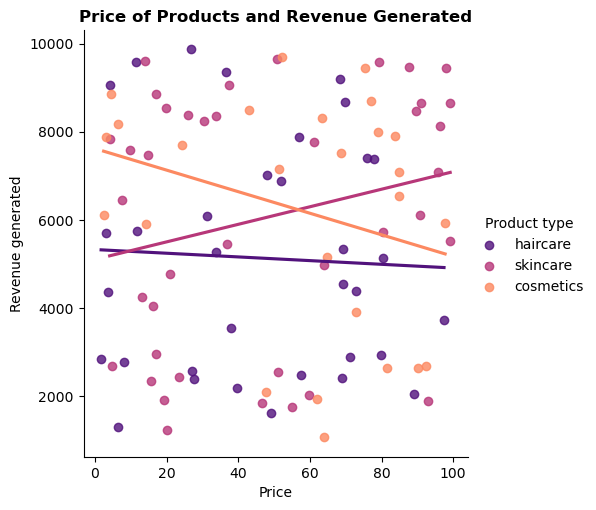

In [13]:
#Creating a Visualization on Price of Products and Revenue Generated by them: 

plt.figure(figsize = (10,10))
sns.lmplot(x='Price', y='Revenue generated', data=df, hue='Product type', ci=None, palette = 'magma')
plt.title("Price of Products and Revenue Generated", fontweight = 'bold')
plt.show()


In [ ]:
Conclusion: 
    Skincare products contribute significantly to the company's revenue, being the primary source, 
    while cosmetics and haircare products generate comparatively lower revenue.

In [15]:
# Grouping the DataFrame by 'Product type' and calculate the sum of 'Number of products sold'

sales_data = df.groupby('Product type')['Number of products sold'].sum()

print(sales_data)

Product type
cosmetics    11757
haircare     13611
skincare     20731
Name: Number of products sold, dtype: int64


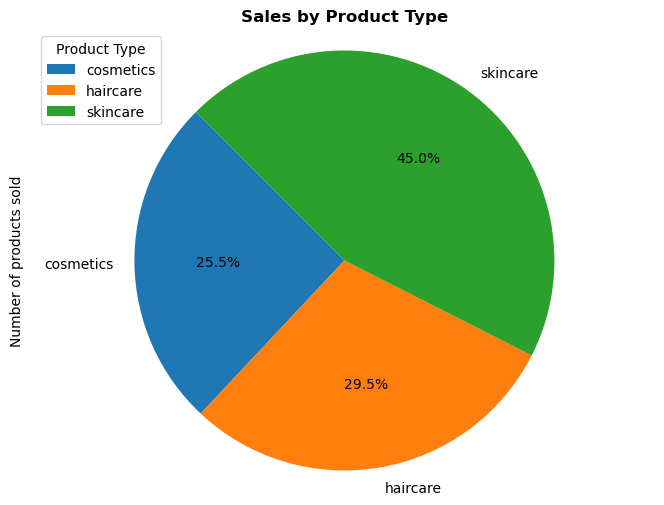

In [16]:
#Creating Visualization Based on Sales Data

plt.figure(figsize = (8,6))

sales_data.plot(kind='pie', autopct='%0.1f%%', startangle = 135)

plt.axis('equal')

plt.legend(sales_data.index , title='Product Type', loc='upper left')

plt.title("Sales by Product Type", fontweight = 'bold')

plt.show()

In [ ]:
Conclusion :
    Skincare leads the sales charts,with haircare following closely in second place, 
    and cosmetics claiming the last spot in terms of revenue generation.

In [17]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [18]:
#Groupby operation for calculating the sum of the "Revenue generated" for each "Shipping carriers"

total_revenue = df.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()

print(total_revenue)
                                                
                                                

  Shipping carriers  Revenue generated
0         Carrier A      142629.994607
1         Carrier B      250094.646988
2         Carrier C      184880.177143


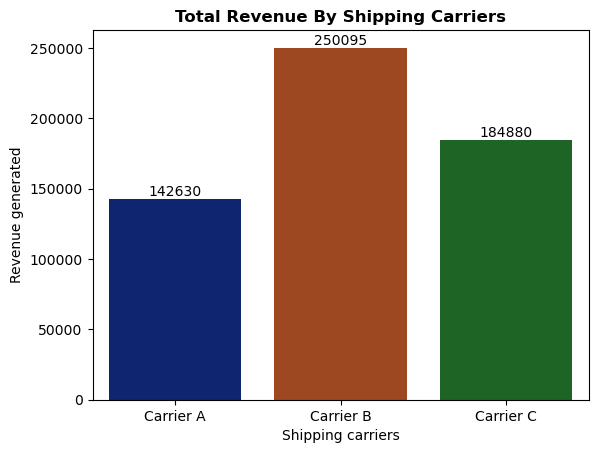

In [19]:
#Creating Visualization on Revenue Generated through Shipping Carriers

fig = sns.barplot(x = total_revenue['Shipping carriers'] , y = total_revenue['Revenue generated'], palette = 'dark')

# Add count labels on top of each bar
for bars in fig.containers:
    fig.bar_label(bars)
    
plt.title("Total Revenue By Shipping Carriers", fontweight = 'bold')
plt.show()

In [ ]:
Conclusion:
    Based on the above visualization, we observe that Carrier B generated the highest revenue. 
    Following that, Carrier C is ranked second in revenue generation, while Carrier A has the lowest revenue among the three carriers.
    

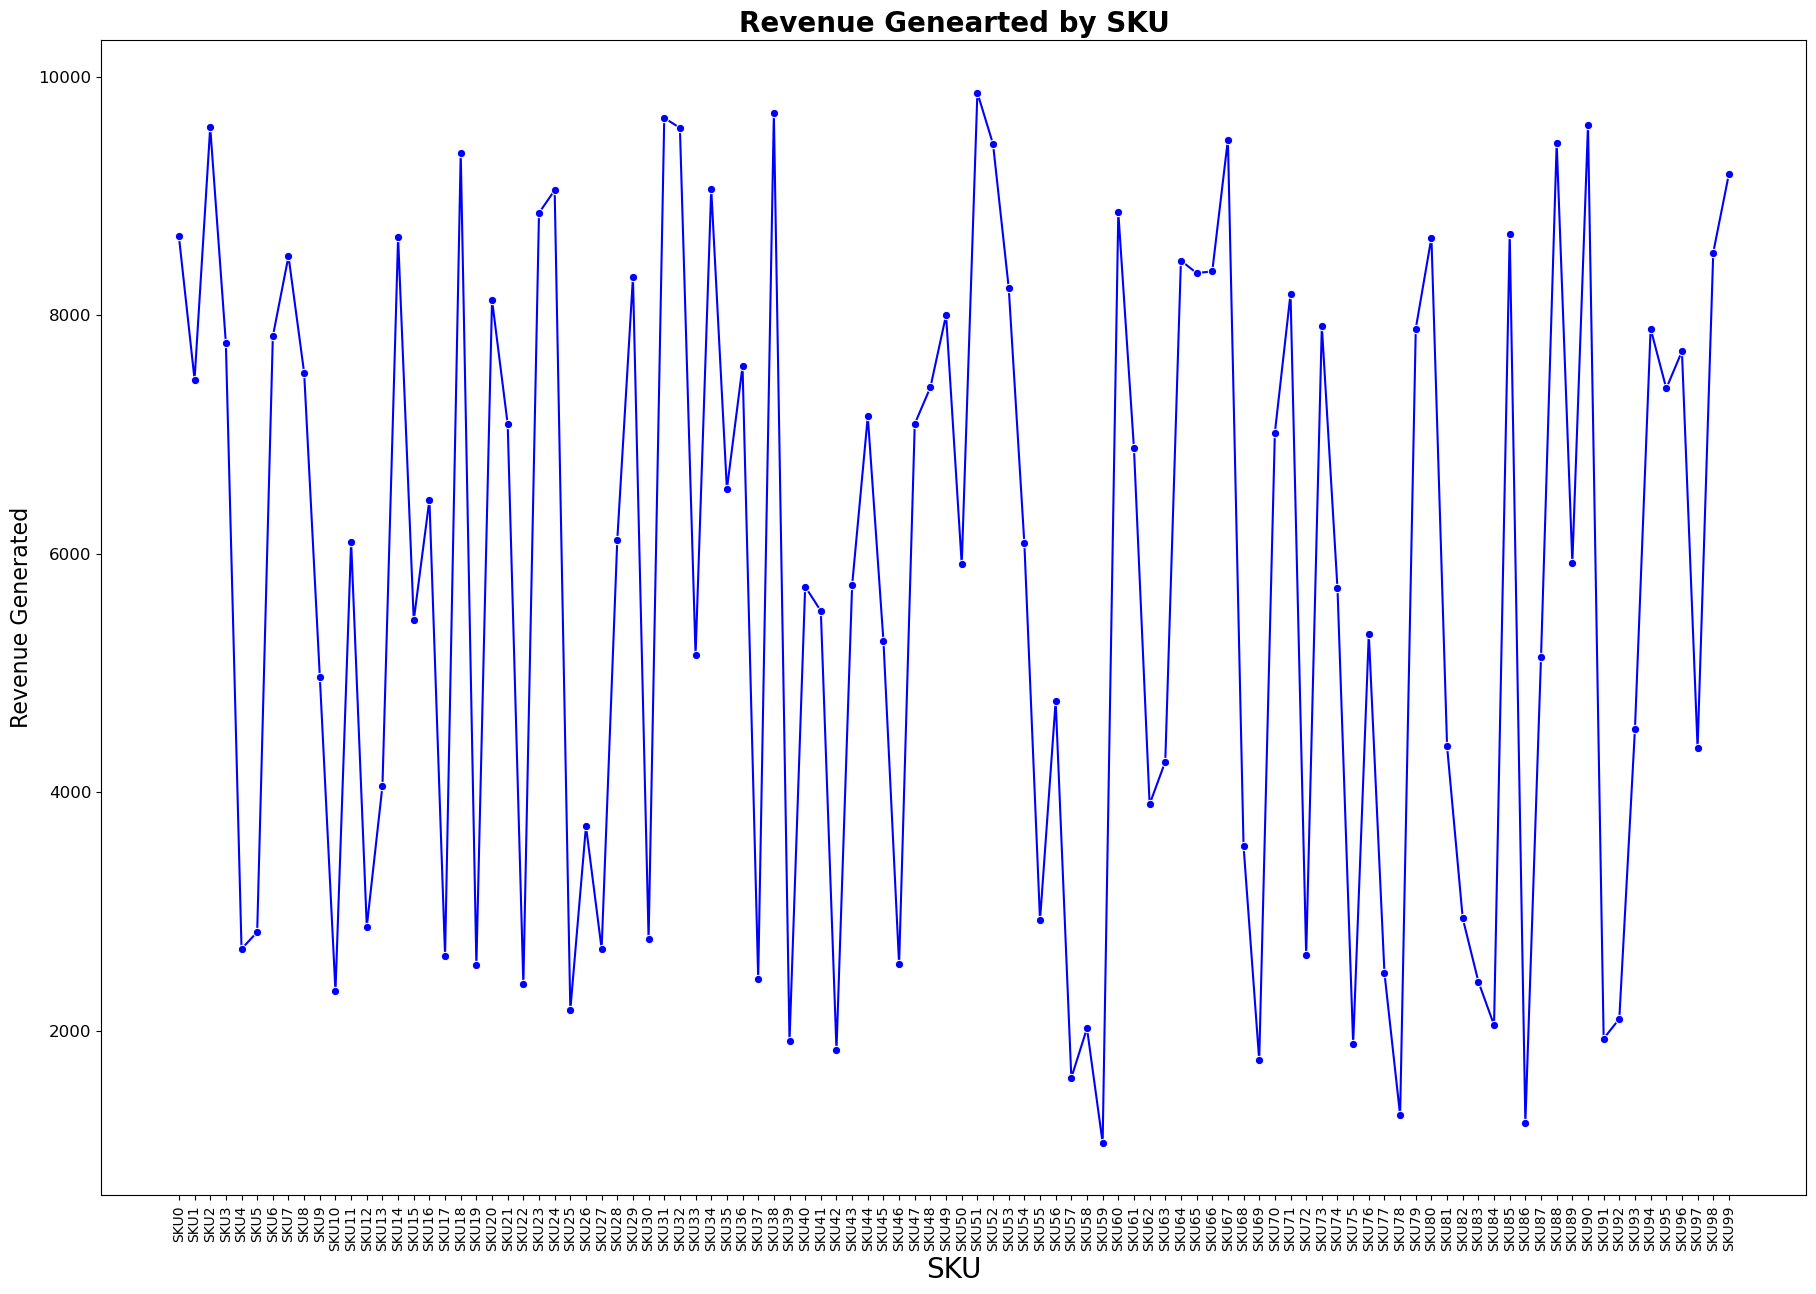

In [20]:
#Creating Visualization on Revenue Generated through Shipping Carriers

plt.figure(figsize=(22, 15))
sns.lineplot(x = 'SKU', y = 'Revenue generated', data = df , marker='o', color='b')

plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 12)

plt.xlabel('SKU', fontsize = 20)
plt.ylabel('Revenue Generated', fontsize = 16)
plt.title('Revenue Genearted by SKU',fontsize = 20, fontweight = 'bold')



plt.show()

In [21]:
#Groupby operation for calculating the sum of the "Shipping costs" for each "Shipping carriers#

shipping_cost = df.groupby('Shipping carriers')['Shipping costs'].sum().reset_index()

print(shipping_cost)

  Shipping carriers  Shipping costs
0         Carrier A      155.537831
1         Carrier B      236.897620
2         Carrier C      162.379457


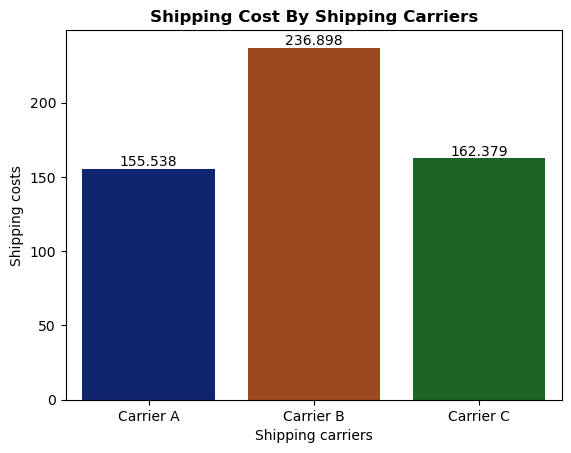

In [22]:
#Creating Visualization on Shipping Cost through Shipping Carriers

fig = sns.barplot(x = shipping_cost['Shipping carriers'] , y = shipping_cost['Shipping costs'], palette = 'dark')

# Add count labels on top of each bar
for bars in fig.containers:
    fig.bar_label(bars)
    
plt.title("Shipping Cost By Shipping Carriers", fontweight = 'bold')
plt.show()

In [ ]:
Conclusion :
    The shipping cost of Carrier B is the highest at 236.898, followed by Carrier C at 162.379, and Carrier A at 155.538.

In [30]:
#Grouping the "Transportation modes" column and then calculating the sum of the "Costs" for each group

transportation_cost = df.groupby('Transportation modes')['Costs'].sum()

print(transportation_cost)

Transportation modes
Air     14604.527498
Rail    15168.931559
Road    16048.193639
Sea      7102.925520
Name: Costs, dtype: float64


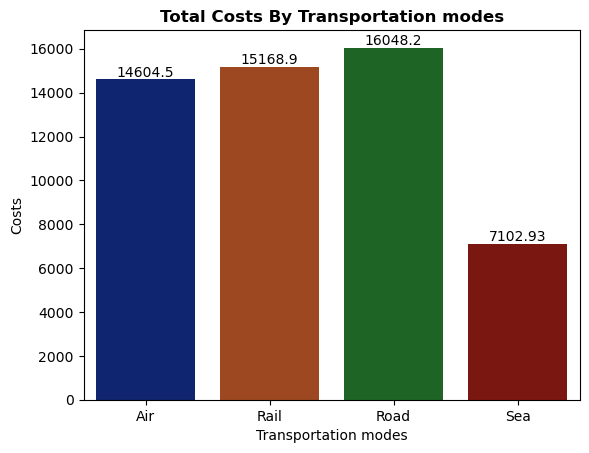

In [24]:
#Creating Visualization on Transportation Costs by differnt Transportation Modes

fig = sns.barplot(x = transportation_cost['Transportation modes'] , y = transportation_cost['Costs'], palette = 'dark')

# Add count labels on top of each bar
for bars in fig.containers:
    fig.bar_label(bars)
    
plt.title("Total Costs By Transportation modes", fontweight = 'bold')
plt.show()

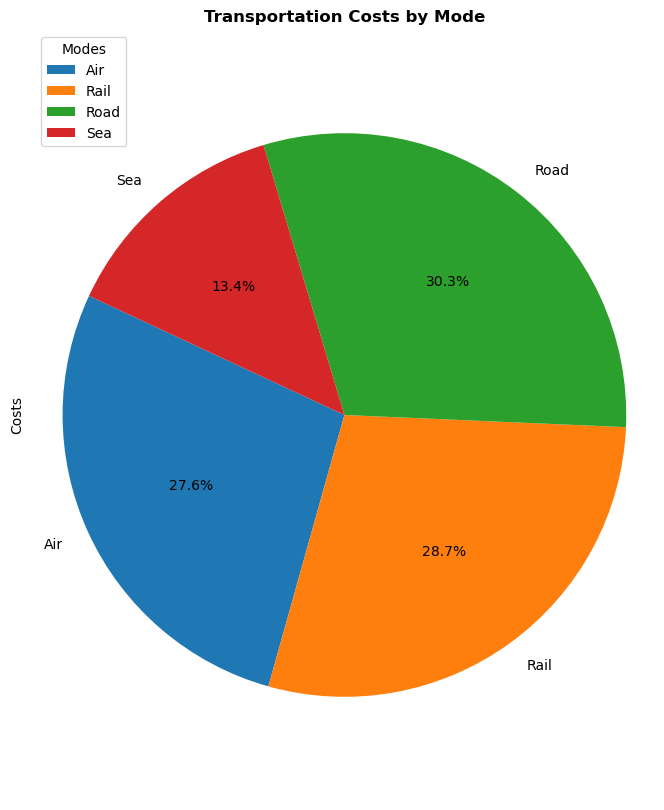

In [34]:
# Plotting the pie chart for transportation_cost 

plt.figure(figsize=(8, 10))


transportation_cost.plot(kind='pie', autopct='%0.1f%%', startangle=155)

plt.axis('equal')


plt.legend(transportation_cost.index, title='Modes', loc='upper left')

plt.title("Transportation Costs by Mode", fontweight='bold')

plt.show()

In [ ]:
Conclusion :
    Based on the visualization above, it is evident that transportation by road incurs the highest costs, 
    followed by rail, air, and finally, sea transportation.

In [35]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [37]:
#Grouping the "Product type" column and then calculating the sum of "Defect rates" for each group

Total_Defect_Rates = df.groupby('Product type')['Defect rates'].sum().reset_index()

print(Total_Defect_Rates)

  Product type  Defect rates
0    cosmetics     49.901461
1     haircare     84.427107
2     skincare     93.387231


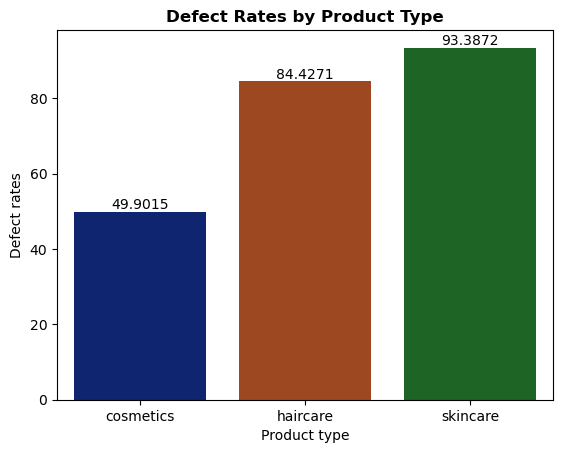

In [39]:
#Creating Visualization on Defect Rates by Product Type

fig = sns.barplot(x = Total_Defect_Rates['Product type'] , y = Total_Defect_Rates['Defect rates'], palette = 'dark')

# Add count labels on top of each bar
for bars in fig.containers:
    fig.bar_label(bars)
    
plt.title("Defect Rates by Product Type", fontweight = 'bold')
plt.show()

In [ ]:
Conclusion :
    Based on the above visualization, we observe that the defect rate is highest in skincare products,
    followed by haircare products in the second position, and cosmetics with the lowest defect rate.